# PCA & t-SNE Visualization of Embeddings

Compare target, predicted, and random embeddings using both PCA and t-SNE.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## 1. Load Data

In [8]:
CSV_PATH = "embeddings.csv"  # <- Change this

df = pd.read_csv(CSV_PATH)
print(f"Loaded {len(df)} samples")
df.head()

Loaded 5000 samples


,sample_index,target_dim_0,target_dim_1,target_dim_2,target_dim_3,target_dim_4,target_dim_5,target_dim_6,target_dim_7,predicted_dim_0,...,predicted_dim_6,predicted_dim_7,random_dim_0,random_dim_1,random_dim_2,random_dim_3,random_dim_4,random_dim_5,random_dim_6,random_dim_7
0,0,-3.096051,3.561484,-2.268346,-4.933867,1.890964,-0.402615,2.714577,-1.929998,-3.620393,...,0.930129,-17.105524,0.565696,0.220991,1.221357,-1.338866,-0.667528,1.131663,0.892826,0.642139
1,1,-6.906901,3.567756,-10.697569,-9.316430,-0.975608,6.363911,9.851562,-3.456476,4.689650,...,-10.975008,-9.732338,1.033559,-0.172078,-0.434293,0.124618,0.485047,1.036299,-0.626500,0.041686
2,2,-0.675388,-0.255922,-1.492815,-0.085465,-0.729260,1.719152,0.869937,0.436122,-1.117734,...,-1.190336,0.476249,0.073894,-0.009457,0.059991,0.102852,0.158298,-0.229986,-0.221989,-0.063468
3,3,-10.136768,9.155208,-4.834434,4.393397,-4.469194,-7.251497,-10.791161,-0.213762,6.166604,...,-8.403220,-17.413591,1.273456,-0.182907,0.072071,-0.947331,-0.121082,1.644406,-0.025511,0.125501
4,4,0.988343,-2.533370,1.309662,1.088836,-1.403995,-1.675892,-2.021471,3.017354,-6.248110,...,-10.995537,0.730301,0.868223,-0.459223,-0.641330,-1.200643,-0.857759,-0.732287,-1.085002,-0.735681


## 2. Extract Embeddings

In [9]:
target_cols = [f"target_dim_{i}" for i in range(8)]
predicted_cols = [f"predicted_dim_{i}" for i in range(8)]
random_cols = [f"random_dim_{i}" for i in range(8)]

target = df[target_cols].values
predicted = df[predicted_cols].values
random = df[random_cols].values

n_samples = len(target)
print(f"Embedding shape: {target.shape}")

Embedding shape: (5000, 8)


## 3. PCA

In [10]:
all_embeddings = np.vstack([target, predicted, random])

pca = PCA(n_components=2)
all_pca = pca.fit_transform(all_embeddings)

target_pca = all_pca[:n_samples]
predicted_pca = all_pca[n_samples:2*n_samples]
random_pca = all_pca[2*n_samples:]

print(f"PCA explained variance: {pca.explained_variance_ratio_.sum():.1%}")

PCA explained variance: 80.0%


## 4. t-SNE

In [11]:
tsne = TSNE(
    n_components=2,
    perplexity=min(30, n_samples - 1),  # perplexity must be < n_samples
    random_state=42,
    init='pca',
    learning_rate='auto'
)
all_tsne = tsne.fit_transform(all_embeddings)

target_tsne = all_tsne[:n_samples]
predicted_tsne = all_tsne[n_samples:2*n_samples]
random_tsne = all_tsne[2*n_samples:]

print("t-SNE complete")

t-SNE complete


## 5. Side-by-Side Comparison

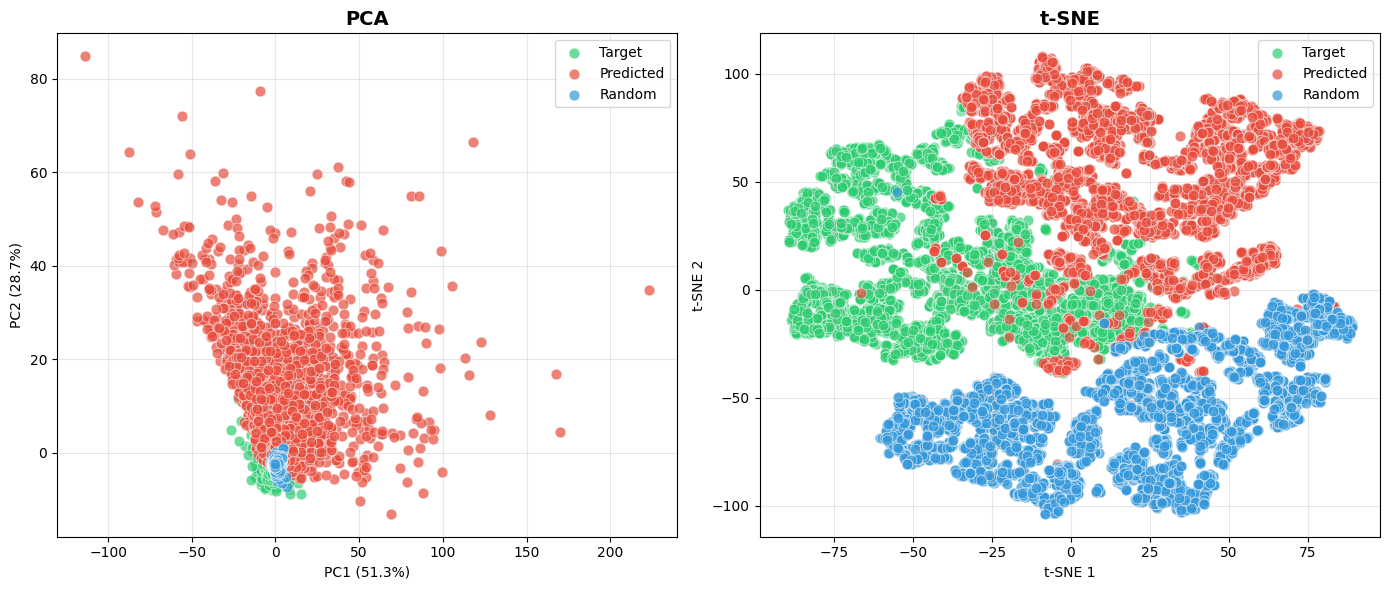

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

colors = {'target': '#2ecc71', 'predicted': '#e74c3c', 'random': '#3498db'}

# PCA plot
ax = axes[0]
ax.scatter(target_pca[:, 0], target_pca[:, 1], c=colors['target'], label='Target', alpha=0.7, s=60, edgecolors='white', linewidth=0.5)
ax.scatter(predicted_pca[:, 0], predicted_pca[:, 1], c=colors['predicted'], label='Predicted', alpha=0.7, s=60, edgecolors='white', linewidth=0.5)
ax.scatter(random_pca[:, 0], random_pca[:, 1], c=colors['random'], label='Random', alpha=0.7, s=60, edgecolors='white', linewidth=0.5)
var = pca.explained_variance_ratio_ * 100
ax.set_xlabel(f'PC1 ({var[0]:.1f}%)')
ax.set_ylabel(f'PC2 ({var[1]:.1f}%)')
ax.set_title('PCA', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# t-SNE plot
ax = axes[1]
ax.scatter(target_tsne[:, 0], target_tsne[:, 1], c=colors['target'], label='Target', alpha=0.7, s=60, edgecolors='white', linewidth=0.5)
ax.scatter(predicted_tsne[:, 0], predicted_tsne[:, 1], c=colors['predicted'], label='Predicted', alpha=0.7, s=60, edgecolors='white', linewidth=0.5)
ax.scatter(random_tsne[:, 0], random_tsne[:, 1], c=colors['random'], label='Random', alpha=0.7, s=60, edgecolors='white', linewidth=0.5)
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_title('t-SNE', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. With Connecting Lines (Target ↔ Predicted)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for ax, (t, p, title) in zip(axes, [(target_pca, predicted_pca, 'PCA'), 
                                     (target_tsne, predicted_tsne, 't-SNE')]):
    # Lines
    for i in range(n_samples):
        ax.plot([t[i, 0], p[i, 0]], [t[i, 1], p[i, 1]], c='gray', alpha=0.3, linewidth=0.8)
    
    ax.scatter(t[:, 0], t[:, 1], c=colors['target'], label='Target', alpha=0.8, s=60, edgecolors='white', linewidth=0.5)
    ax.scatter(p[:, 0], p[:, 1], c=colors['predicted'], label='Predicted', alpha=0.8, s=60, edgecolors='white', linewidth=0.5)
    
    ax.set_title(f'{title}: Target vs Predicted', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Quantitative Comparison

In [ ]:
# Distances in original 8D space
pred_dist = np.linalg.norm(target - predicted, axis=1)
rand_dist = np.linalg.norm(target - random, axis=1)

print("Euclidean distance in 8D space:")
print(f"  Target ↔ Predicted: {pred_dist.mean():.3f} ± {pred_dist.std():.3f}")
print(f"  Target ↔ Random:    {rand_dist.mean():.3f} ± {rand_dist.std():.3f}")
print(f"  Ratio (pred/rand):  {pred_dist.mean() / rand_dist.mean():.3f}")

In [ ]:
# Cosine similarity
def cosine_sim(a, b):
    return np.sum(a * b, axis=1) / (np.linalg.norm(a, axis=1) * np.linalg.norm(b, axis=1))

pred_cos = cosine_sim(target, predicted)
rand_cos = cosine_sim(target, random)

print("Cosine similarity:")
print(f"  Target ↔ Predicted: {pred_cos.mean():.3f} ± {pred_cos.std():.3f}")
print(f"  Target ↔ Random:    {rand_cos.mean():.3f} ± {rand_cos.std():.3f}")